In [444]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [445]:
df = pd.read_csv(r"C:\Users\emilb\OneDrive\Desktop\iris (1).csv")

In [446]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [447]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [448]:
df.shape

(150, 5)

In [449]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [450]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [452]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

In [453]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [454]:
num=df.select_dtypes(include="float64")

In [455]:
num

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


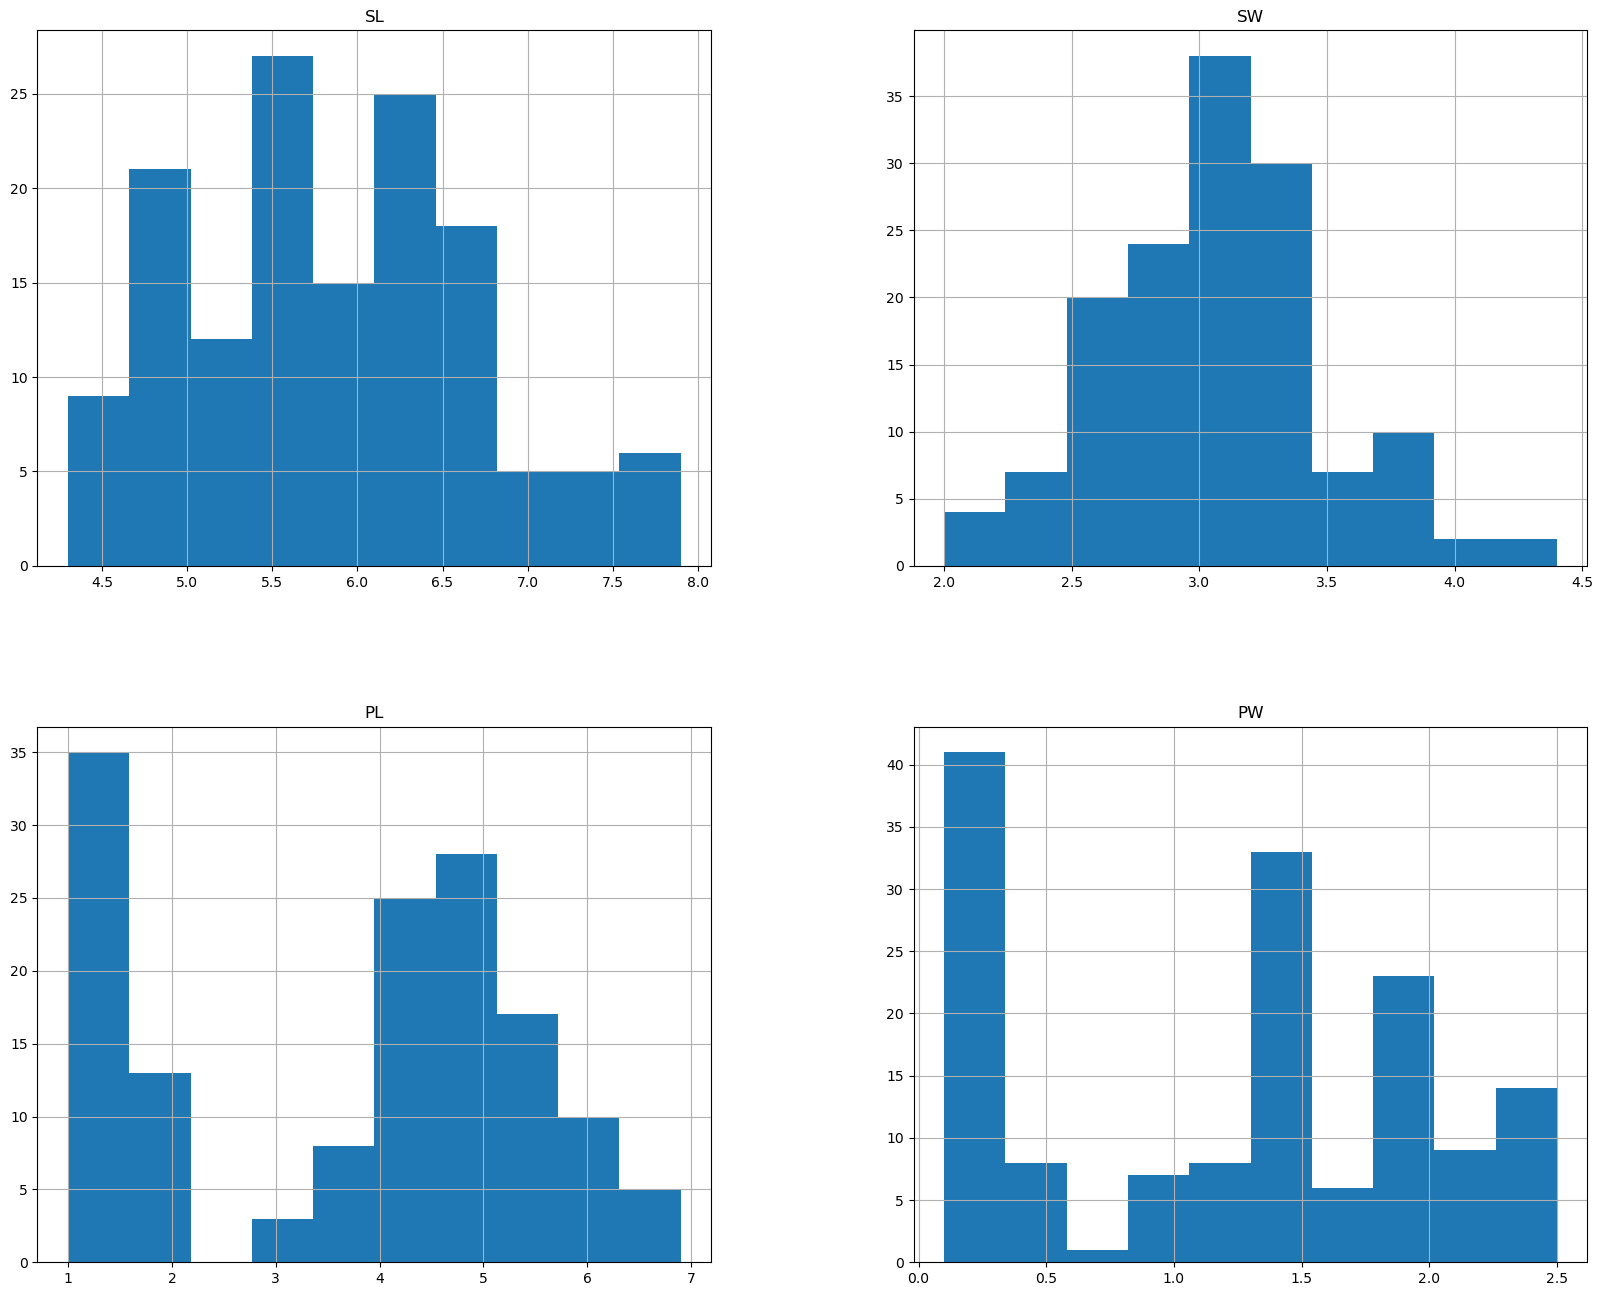

In [456]:
num.hist(figsize=[20,16])
plt.show()

In [457]:
df["SL"]=df["SL"].fillna(df["SL"].median())

In [458]:
df["SW"]=df["SW"].fillna(df["SL"].mean())

In [459]:
df["PL"]=df["PL"].fillna(df["SL"].median())

In [460]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [461]:
df.duplicated().sum()

3

In [462]:
df = df.drop_duplicates()

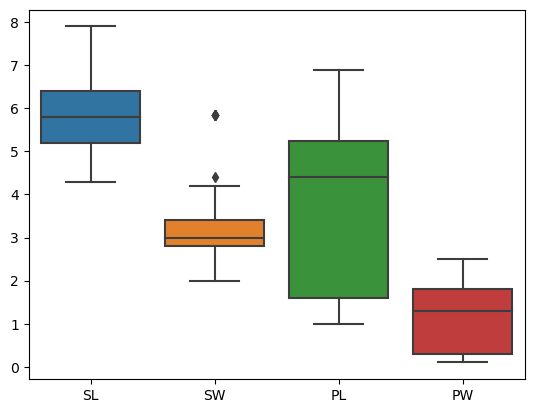

In [463]:
sns.boxplot(df)
plt.show()

In [467]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["SW"].quantile(0.25)
Q3 = df["SW"].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = []
for x in df["SW"]:
    if x < lower_bound or x > upper_bound:
        outlier.append(x)

print(outlier)

# Find indices of outliers
ind = (df["SW"] > upper_bound) | (df["SW"] < lower_bound)
outlier_indices = df.loc[ind].index
print(outlier_indices)

# Drop outliers
df.drop(outlier_indices, inplace=True)

# Check the shape of the data after dropping outliers
print(df.shape)



[4.1, 4.2, 2.0]
Index([32, 33, 60], dtype='int64')
(137, 5)


C:\Users\emilb\AppData\Local\Temp\ipykernel_1016\1063837414.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outlier_indices, inplace=True)


In [468]:

df.shape

(137, 5)

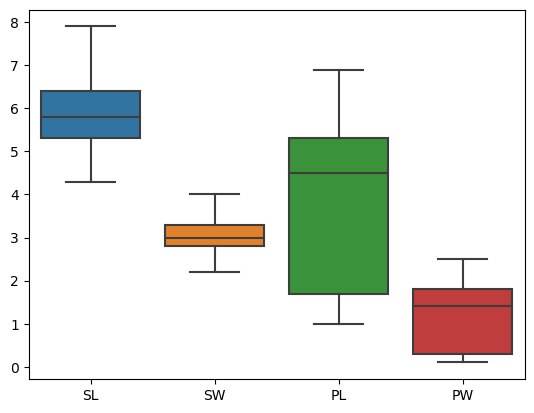

In [469]:
sns.boxplot(df)
plt.show()

In [470]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Classification"]=le.fit_transform(df["Classification"])

C:\Users\emilb\AppData\Local\Temp\ipykernel_1016\3915077676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Classification"]=le.fit_transform(df["Classification"])


In [471]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

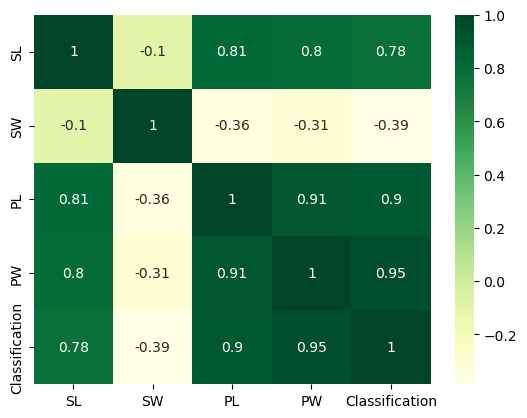

In [472]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,cmap="YlGn")

In [473]:
y=df["Classification"]
x=df.drop("Classification",axis=1)

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

# Logistic Regression

In [475]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_log_pred =lr.predict(x_test)
y_log_pred

C:\Users\emilb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2])

In [476]:
acc_log = accuracy_score(y_test,y_log_pred)
pre_log = precision_score(y_test,y_log_pred,average='weighted')
re_log = recall_score(y_test,y_log_pred,average='weighted')
f1_log = f1_score(y_test,y_log_pred,average='weighted')

In [477]:
print('Accuracy: ',acc_log)
print('Precision: ',pre_log)
print('Recall: ',re_log)
print('F1: ',f1_log)
     

Accuracy:  0.9428571428571428
Precision:  0.9504761904761905
Recall:  0.9428571428571428
F1:  0.9420408163265305


# KNN

Text(0, 0.5, 'accuracy')

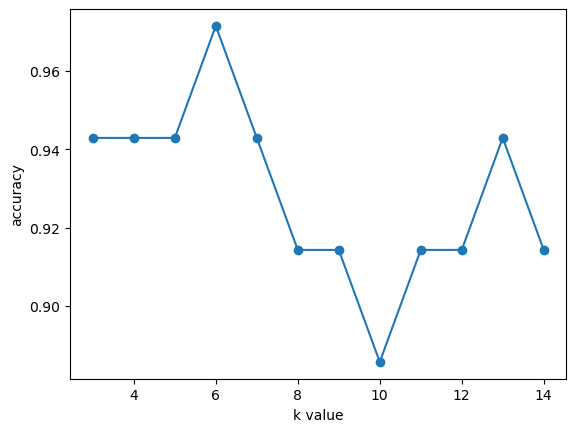

In [478]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors =np.arange(3,15)
for k in neighbors:
    k_model=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    k_model.fit(x_train,y_train)
    y_pred_knn=k_model.predict(x_test)
    acc_knn=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [479]:
knn=KNeighborsClassifier(n_neighbors=6,metric="minkowski")
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
pre_knn = precision_score(y_test,y_pred_knn, average='weighted')
re_knn = recall_score(y_test,y_pred_knn, average='weighted')
f1_knn = f1_score(y_test,y_pred_knn, average='weighted')

In [480]:
print('Accuracy: ',acc_knn)
print('Precision: ',pre_knn)
print('Recall: ',re_knn)
print('F1: ',f1_knn)

Accuracy:  0.9714285714285714
Precision:  0.973469387755102
Recall:  0.9714285714285714
F1:  0.9712773998488284


# Decision Tree model

In [481]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred_dt)
pre_dt = precision_score(y_test,y_pred_dt, average='weighted')
re_dt = recall_score(y_test,y_pred_dt, average='weighted')
f1_dt = f1_score(y_test,y_pred_dt, average='weighted')
     

In [482]:
print('Accuracy: ',acc_dt)
print('Precision: ',pre_dt)
print('Recall: ',re_dt)
print('F1: ',f1_dt)
     

Accuracy:  0.9142857142857143
Precision:  0.9303571428571429
Recall:  0.9142857142857143
F1:  0.911952294529427


# Randanom Forest Model

In [483]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)   
acc_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test,y_pred_rf, average='weighted')
re_rf = recall_score(y_test,y_pred_rf, average='weighted')
f1_rf = f1_score(y_test,y_pred_rf, average='weighted')
     

In [484]:
print('Accuracy: ',acc_rf)
print('Precision: ',pre_rf)
print('Recall: ',re_rf)
print('F1: ',f1_rf)

Accuracy:  0.9428571428571428
Precision:  0.9504761904761905
Recall:  0.9428571428571428
F1:  0.9420408163265305


# SVM

In [485]:
from sklearn.svm import SVC
sv= SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
acc_sv = accuracy_score(y_test,y_pred_sv)
pre_sv = precision_score(y_test,y_pred_sv, average='weighted')
re_sv = recall_score(y_test,y_pred_sv, average='weighted')
f1_sv = f1_score(y_test,y_pred_sv, average='weighted')
     

In [486]:
print('Accuracy: ',acc_sv)
print('Precision: ',pre_sv)
print('Recall: ',re_sv)
print('F1: ',f1_sv)

Accuracy:  0.8857142857142857
Precision:  0.8857142857142857
Recall:  0.8857142857142857
F1:  0.8857142857142857


# Naive BAyers Model

In [487]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_nb=gnb.predict(x_test)
acc_nb = accuracy_score(y_test,y_pred_nb)
pre_nb = precision_score(y_test,y_pred_nb, average='weighted')
re_nb= recall_score(y_test,y_pred_nb, average='weighted')
f1_nb = f1_score(y_test,y_pred_nb, average='weighted')
     

In [488]:
print('Accuracy: ',acc_nb)
print('Precision: ',pre_nb)
print('Recall: ',re_nb)
print('F1: ',f1_nb)

Accuracy:  0.9714285714285714
Precision:  0.973469387755102
Recall:  0.9714285714285714
F1:  0.9712773998488284


In [489]:
Accuracy = pd.DataFrame({'Models': ['Logistic Regression', 'KNN','Decision Tree', 'Random Forest','SVM_Linear', "Naive BAyers Model"],
                         'Accuracies':[acc_log,acc_knn,acc_dt,acc_rf,acc_sv,acc_nb]})


In [490]:
Accuracy

,Models,Accuracies
0,Logistic Regression,0.942857
1,KNN,0.971429
2,Decision Tree,0.914286
3,Random Forest,0.942857
4,SVM_Linear,0.885714
5,Naive BAyers Model,0.971429


This table shows the performance of various models, with KNN and Naive Bayes achieving the highest accuracy of approximately 97.14%